In [2]:
# !pip install PyPDF2
# !pip install nltk
# !pip install wordcloud
# !pip install PyMuPDF
# from spacy.cli import download
# download("en_core_web_sm")
# !pip install pycryptodome
# !pip install bertopic
# import nltk
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')
# from nltk.stem import WordNetLemmatizer
# nltk.download('wordnet')

In [3]:
import PyPDF2
import string
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import spacy
import re
import matplotlib.pyplot as plt
from collections import Counter
import fitz  # PyMuPDF
from wordcloud import WordCloud
from spacy import displacy
from nltk.tokenize import word_tokenize
from bertopic import BERTopic
import os
nltk.download('stopwords')
stop = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Loading and Preprocessing the Corpus

## Extracting the Data

In [ ]:
def extract_pdf(file_path,from_page_number,to_page_number):
    extracted_data = ""
    pdf = PyPDF2.PdfReader(file_path)
    for i in range(from_page_number,to_page_number):
        page = pdf.pages[i]
        extracted_data += page.extract_text()
    return extracted_data

In [ ]:
# %pip install pycryptodome
extracted_data_PMI = extract_pdf("/content/drive/MyDrive/PRM/PRM-Conceptual-Graphs-Recommendations/input/practice-standard-project-risk-management.pdf",12,124)

# Cleaning PMI

In [ ]:
def clean_pmi(pmi_corpus):
  patterns_substitutions = [
        (r'ﬁ\s\s', 'fi'),  # Replace 'fi' with 'fi'
        (r'\d©2009 Project Management Institute\. Practice Standard for Project Risk Management\d', ''),  # Remove footer
        (r'©2009 Project Management Institute. Practice Standard for Project Risk Management', ''),  # Remove the copyright notice
        (r'[^a-zA-Z0-9 .]+', ''),  # Remove punctuation and unwanted characters
        (r'\s+', ' '), #remove extra spaces
    ]
  for pattern, substitution in patterns_substitutions:
        pmi_corpus = re.sub(pattern, substitution, pmi_corpus)
  filtered_words = ' '.join([word.lower() for word in pmi_corpus.split() if word.lower() not in stop])
  sentences_pmi = re.split(r'(?<!\d)\.(?!\d)', filtered_words)
  return sentences_pmi

In [ ]:
def cleaning_pmi(pmi_corpus,tokenize=False):
    # Define a list of patterns and substitutions
    patterns_substitutions = [
        (r'ﬁ\s\s', 'fi'),  # Replace 'fi' with 'fi'
        (r'\d©2009 Project Management Institute\. Practice Standard for Project Risk Management\d', ''),  # Remove footer
        (r'©2009 Project Management Institute. Practice Standard for Project Risk Management', ''),  # Remove the copyright notice
        (r'[^a-zA-Z0-9 .]+', ''),  # Remove punctuation and unwanted characters
        (r'\s+', ' '), #remove extra spaces


    ]

    # Apply all patterns and substitutions in sequence
    for pattern, substitution in patterns_substitutions:
        pmi_corpus = re.sub(pattern, substitution, pmi_corpus)



    if tokenize:
        tokens = word_tokenize(pmi_corpus)

        # Stopword removal
        stopwords_set = set(stopwords.words('english'))
        filtered_tokens = [token for token in tokens if token not in stopwords_set]

        return filtered_tokens

    return pmi_corpus


In [ ]:
print(cleaning_pmi(extracted_data_PMI,tokenize=True))
tokenized_pmi = cleaning_pmi(extracted_data_PMI,tokenize=True)
# extracted_pmi = cleaning_pmi(extracted_data_PMI, tokenize=False)

['CHAPTER', '1', 'INTRODUCTION', 'Project', 'Management', 'Institute', 'PMI', 'practice', 'standards', 'guides', 'use', 'tool', 'technique', 'process', 'identified', 'A', 'Guide', 'Project', 'Management', 'Body', 'Knowledge', 'PMBOK', 'Guide', 'Fourth', 'Edition', 'PMI', 'standards', '.', 'Practice', 'standards', 'targeted', 'audiences', 'participate', 'management', 'projects', '.', 'This', 'includes', 'project', 'managers', 'project', 'personnel', 'contract', 'personnel', 'supervisors', 'project', 'stakeholders', '.', 'A', 'PMI', 'practice', 'standard', 'describes', 'processes', 'activities', 'inputs', 'outputs', 'specific', 'Knowledge', 'Area', '.', 'It', 'provides', 'information', 'significant', 'process', 'tool', 'technique', 'significant', 'performed', 'executed', 'necessary', 'clarification', 'perform', 'process', '.', 'A', 'practice', 'standard', 'prescribe', 'process', 'implemented', 'leaving', 'subject', 'forums', 'handbooks', 'manuals', 'courses', '.', 'This', 'chapter', 'inc

In [156]:
# Load spaCy's English NLP model
nlp = spacy.load("en_core_web_sm")

text = " ".join(tokenized_pmi)

doc = nlp(text)

# for token in doc:
#     print(f"{token.text}: {token.pos_}")

###  POS Frequency Analysis with Bar Chart

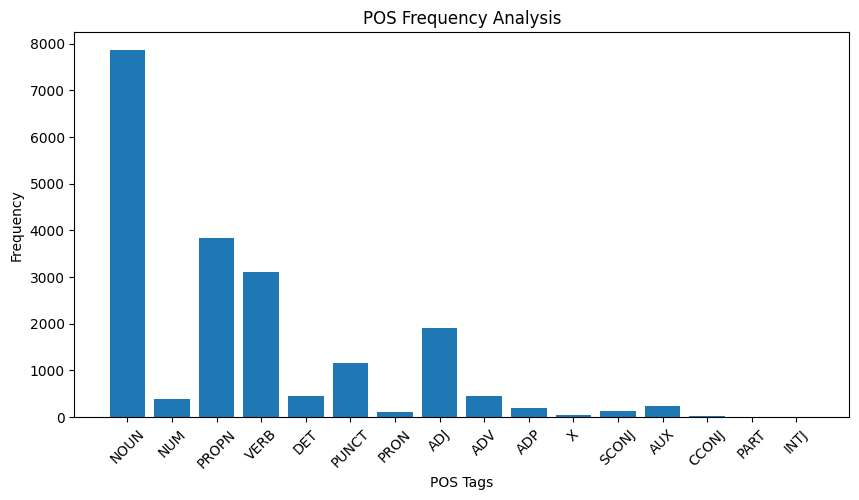

In [ ]:
pos_counts = Counter(token.pos_ for token in doc)

# Create a bar chart for POS frequency analysis
pos_labels, pos_values = zip(*pos_counts.items())

plt.figure(figsize=(10, 5))
plt.bar(pos_labels, pos_values)
plt.xlabel("POS Tags")
plt.ylabel("Frequency")
plt.title("POS Frequency Analysis")
plt.xticks(rotation=45)
plt.show()

### WordCloud for nouns

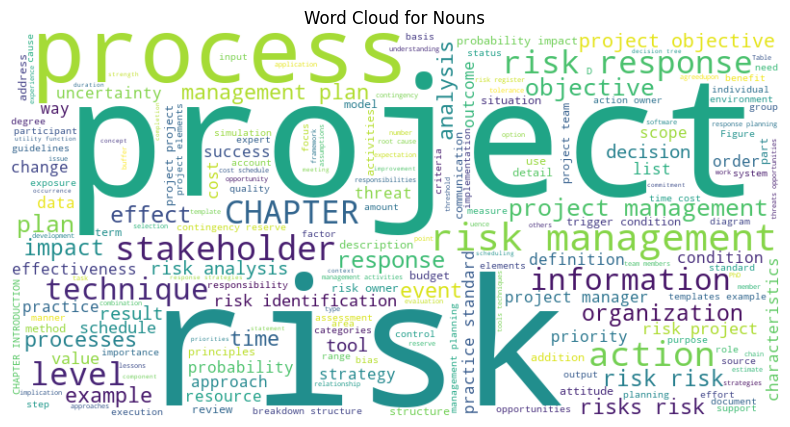

In [ ]:
# Filter tokens to include only nouns
nouns = [token.text for token in doc if token.pos_ == "NOUN"]

# Create a word cloud for nouns
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(nouns))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud for Nouns")
plt.show()


In [ ]:
#Initialize a counter for nouns
noun_counter = Counter()

# Iterate through the tokens in the document and count nouns
for token in doc:
    if token.pos_ == "NOUN":
        noun_counter[token.text] += 1

# Get the most frequent nouns (e.g., top 10)
most_common_nouns = noun_counter.most_common(10)

# Print the most frequent nouns and their frequencies
for noun, frequency in most_common_nouns:
    print(f"Noun: {noun}, Frequency: {frequency}")

Noun: risk, Frequency: 585
Noun: project, Frequency: 557
Noun: risks, Frequency: 264
Noun: management, Frequency: 237
Noun: process, Frequency: 141
Noun: Risk, Frequency: 134
Noun: objectives, Frequency: 96
Noun: analysis, Frequency: 88
Noun: stakeholders, Frequency: 81
Noun: plan, Frequency: 78


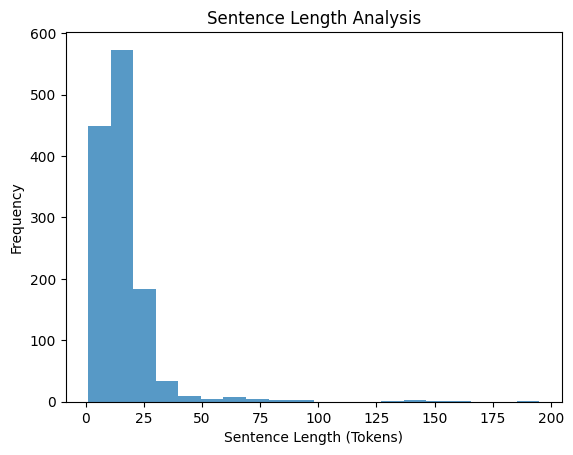

In [ ]:
# Calculate sentence lengths (in terms of token count)
sentence_lengths = [len(list(sent)) for sent in doc.sents]

# Create a histogram or box plot to visualize sentence length distribution
plt.hist(sentence_lengths, bins=20, alpha=0.75)
plt.xlabel("Sentence Length (Tokens)")
plt.ylabel("Frequency")
plt.title("Sentence Length Analysis")
plt.show()


In [ ]:
# Visualize the syntactic structure of a specific sentence (e.g., the first sentence)
displacy.serve(list(doc.sents)[8], style="dep")



Using the 'dep' visualizer
Serving on http://0.0.0.0:5000 ...

Shutting down server on port 5000.


## Bert Topic Modeling On PMI

In [ ]:
clean_pmi = clean_pmi(extracted_data_PMI)

In [ ]:
len(clean_pmi)

1197

In [ ]:
sentence_list_pmi= [x for x in clean_pmi if x !=  'g' and x != 'e']
len(sentence_list_pmi)

1160

In [ ]:
sentence_list_pmi[:10]

['chapter 1 introduction project management institute pmi practice standards guides use tool technique process identified guide project management body knowledge pmbok guide fourth edition pmi standards',
 ' practice standards targeted audiences participate management projects',
 ' includes project managers project personnel contract personnel supervisors project stakeholders',
 ' pmi practice standard describes processes activities inputs outputs specific knowledge area',
 ' provides information significant process tool technique significant performed executed necessary clarification perform process',
 ' practice standard prescribe process implemented leaving subject forums handbooks manuals courses',
 ' chapter includes following sections 1.1 purpose practice standard project risk management 1.2 project risk management definition 1.3 role project risk management project management 1.4 good risk management practice 1.5 critical success factors project risk management chapter 1 introdu

In [ ]:
# sentence_list_pmi[5:]

probabilities are used to determine the probability that a document belongs to a particular topic.


In [ ]:
topic_model_pmi = BERTopic(language="english", calculate_probabilities=True, verbose=True)
topics_pmi, probs_pmi = topic_model_pmi.fit_transform(sentence_list_pmi)

Batches:   0%|          | 0/37 [00:00<?, ?it/s]

2023-10-02 09:39:44,400 - BERTopic - Transformed documents to Embeddings
2023-10-02 09:39:48,968 - BERTopic - Reduced dimensionality
2023-10-02 09:39:49,050 - BERTopic - Clustered reduced embeddings


In [ ]:
freq_pmi = topic_model_pmi.get_topic_info();
freq_pmi

,Topic,Count,Name,Representation,Representative_Docs
0,-1,351,-1_project_risk_risks_management,"[project, risk, risks, management, plan, may, ...",[ provides answers several questions likely pr...
1,0,96,0_risks_cause_impact_may,"[risks, cause, impact, may, root, causes, iden...",[ care needs taken using technique risk identi...
2,1,87,1_pmp_mba_phd_msc,"[pmp, mba, phd, msc, david, mpm, pe, ms, kumar...",[ myers pmp pranay srivastava pmp csmmustapha ...
3,2,83,2_management_project_processes_risk,"[management, project, processes, risk, process...",[ 1 chapter 3 introduction project risk manage...
4,3,77,3_practice_standard_standards_guide,"[practice, standard, standards, guide, edition...",[chapter 1 introduction project management ins...
5,4,48,4_owner_actions_action_agreedupon,"[owner, actions, action, agreedupon, assigned,...","[ risk action owner, person responsible ensur..."
6,5,38,5_responses_response_plan_risk,"[responses, response, plan, risk, planning, ov...",[ plan risk responses chapter 8 determines app...
7,6,33,6_qualitative_perform_analysis_risks,"[qualitative, perform, analysis, risks, techni...",[ highlevel comparison quantitative qualitativ...
8,7,28,7_decision_cost_monte_carlo,"[decision, cost, monte, carlo, simulation, sch...",[ examples output schedule cost risk results s...
9,8,28,8_structure_breakdown_rbs_example,"[structure, breakdown, rbs, example, system, d...",[ d.2.1.16 risk breakdown structure rbs risk b...


In [ ]:
topic_model_pmi.get_topic(0)

[('risks', 0.05786012278491493),
 ('cause', 0.05654248657286832),
 ('impact', 0.04152231731651808),
 ('may', 0.0412998530371548),
 ('root', 0.03988118217426175),
 ('causes', 0.038958919142525306),
 ('identify', 0.038879598701901254),
 ('probability', 0.0384582676298697),
 ('identification', 0.03654878345102036),
 ('risk', 0.03430951438706911)]

### Visualize Topics

In [ ]:
topic_model_pmi.visualize_topics()

In [ ]:
len(probs_pmi)

1160

### Visualize Probabilities

In [ ]:
topic_model_pmi.visualize_distribution(probs_pmi[200], min_probability=0.02)

### Bar Char out of c-TF-IDF
for an x term with class c

In [ ]:
topic_model_pmi.visualize_barchart(top_n_topics=5)

### Visualize Topic Similarities

In [ ]:
topic_model_pmi.visualize_heatmap(n_clusters=25, width=1000, height=1000)

# Cleaning PMBOK

## Checking whole extracted data

In [47]:
# Open the PDF file
pdf_file_path = "/content/drive/MyDrive/PRM/PRM-Conceptual-Graphs-Recommendations/input/PMBOK6-2017.pdf"  # Replace with the path to your PDF file
pdf_document = fitz.open(pdf_file_path)

# Initialize an empty string to store extracted text
extracted_text = ''

# Iterate through pages and extract text
for page_num in range(430,493): #395+35 -> 458+35
    page = pdf_document[page_num]
    page_text = page.get_text()
    extracted_text += page_text

# Close the PDF document
pdf_document.close()

# Print or process the extracted text
# extracted_text

## Cleaning PMBOK

In [48]:
def clean_pmbok(extracted_text):
    # Define a list of patterns and their corresponding replacements
    patterns_and_replacements = [
        (r'Not For Distribution, Sale or Reproduction\.', ''),
        (r'Part 1 - Guide', ''),
        (r'\d{3}', ''),
        (r'(?<![a-zA-Z])u(?!.)', ''),
        (r'u ', ''),
        (r'\bn\b',''),
        (r'ﬁ', 'fi'),
        (r'\(', ''),
        (r'\)', ''),
        (r',', ''),
        (r'`', '')
        #(r'\n','')
    ]

    # Apply the patterns and replacements using a single re.sub call
    for pattern, replacement in patterns_and_replacements:
        extracted_text = re.sub(pattern, replacement, extracted_text)

    return extracted_text

In [49]:
pmbok_clean = clean_pmbok(extracted_text)
print(pmbok_clean)

In [29]:
# @title Saving Clean_Pmbok as a Text File to remove figures
# text_file = open("/content/drive/MyDrive/PRM/PRM-Conceptual-Graphs-Recommendations/src/clean_pmbok1.txt", "w")
# n = text_file.write(pmbok_clean)
# text_file.close()

In [ ]:
with open(r'/content/drive/MyDrive/PRM/PRM-Conceptual-Graphs-Recommendations/src/clean_pmbok.txt', 'r') as file:
    # Read the entire contents of the file into a string
    clean_pmbok_without_figures = file.read()
# print(clean_pmbok_without_figures)

In [118]:
#More Cleaning
clean_pmbok_without_figures = re.sub(r'\be\.g\b', 'for example', clean_pmbok_without_figures)
clean_pmbok_without_figures = re.sub(r',', '', clean_pmbok_without_figures)

In [119]:
#Lower Case + Removing Stop Words
filtered_words_pmbok = ' '.join([word.lower() for word in clean_pmbok_without_figures.split() if word.lower() not in stop])
#Lower Case Without removing Stop Words
# filtered_words_pmbok = ' '.join([word.lower() for word in clean_pmbok_without_figures.split()])
sentences_pmbok = re.split(r'(?<!\d)\.(?!\d)', filtered_words_pmbok)
# sentences_pmbok

### Removing Redundancy + Lemmitization

In [120]:
def remove_repeated_and_plural_words(list_of_sentences):
    unique_sentences = []
    lemmatizer = WordNetLemmatizer()
    for sentence in list_of_sentences:
        words = sentence.split()
        unique_words = []
        for word in words:
            lemma_word = lemmatizer.lemmatize(word)
            if lemma_word not in unique_words:
                unique_words.append(lemma_word)
        unique_sentence = ' '.join(unique_words)
        unique_sentences.append(unique_sentence)
    return unique_sentences

In [89]:
# Testing Function
list = ['hello hello test','how are you you ? risks risk','im fine','thanks thanks bye']
remove_repeated_and_plural_words(list)

['hello test', 'how are you ? risk', 'im fine', 'thanks bye']

In [121]:
unique_sentences_pmbok = remove_repeated_and_plural_words(sentences_pmbok)

### Pos Tagging PMBOK

In [122]:
def pos_tagging(list_of_sentences):
    pos_tagged_sentences = []
    for sentence in list_of_sentences:
        try:
            words = nltk.word_tokenize(sentence)
            pos_tags = nltk.pos_tag(words)
            pos_tagged_sentences.append(pos_tags)
        except Exception as e:
            print(f"Error processing sentence: {sentence}")
            continue  # Skip the sentence with errors
    return pos_tagged_sentences

## TOP 10 Most Common Pos Tags

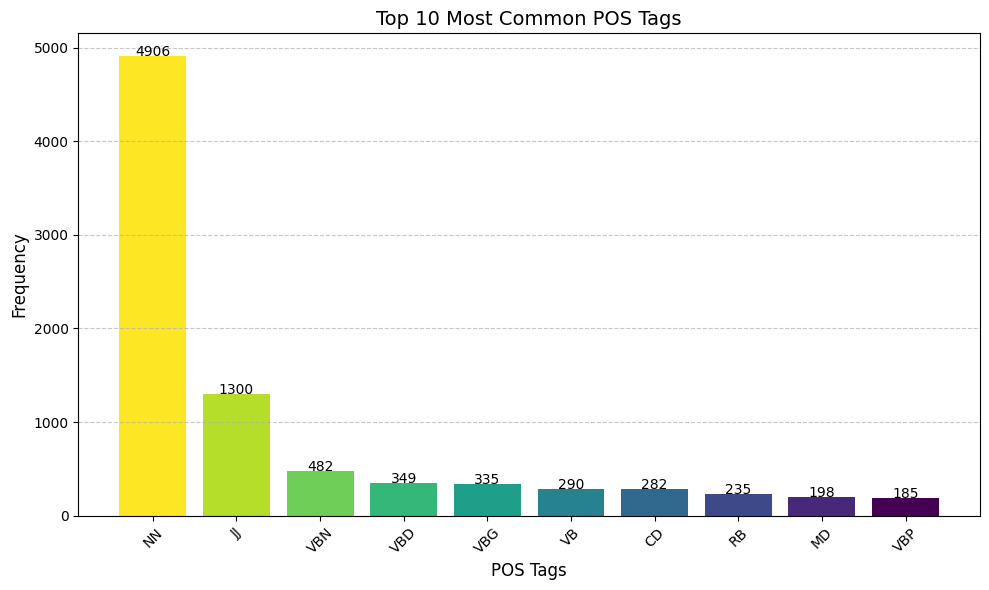

In [123]:
pos_tagged_pmbok = pos_tagging(unique_sentences_pmbok)
flat_pos_tags = [tag for tags in pos_tagged_pmbok for _, tag in tags] # Flatten the list of POS tags
pos_tag_counts = Counter(flat_pos_tags) # Count the frequency of each POS tag
most_common_pos_tags = pos_tag_counts.most_common(10)
tags, counts = zip(*most_common_pos_tags) # Separate the POS tags and their counts

colors = plt.cm.viridis_r(np.linspace(0, 1, len(tags)))
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(tags, counts, color=colors)
plt.xlabel('POS Tags', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Top 10 Most Common POS Tags', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
ax.grid(axis='y', linestyle='--', alpha=0.7)
for bar, count in zip(bars, counts):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05, str(count), ha='center', fontsize=10)
plt.tight_layout()
plt.show()

## Top 10 Most Common Nouns

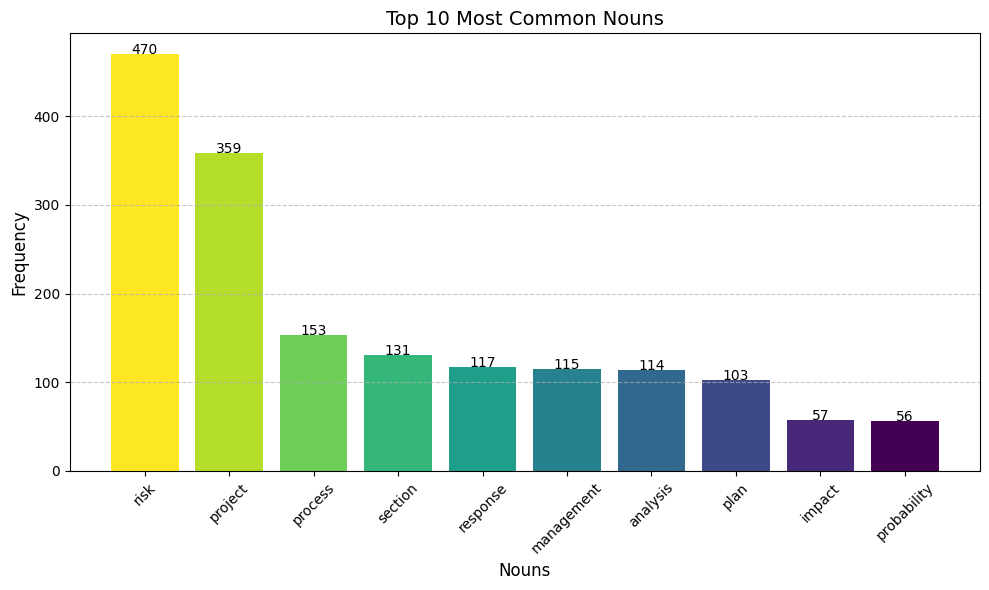

In [124]:
flat_words_tags = [(word, tag) for tags in pos_tagged_pmbok for word, tag in tags]
nouns = [word for word, tag in flat_words_tags if tag in ['NN', 'NNS']]
noun_counts = Counter(nouns)
most_common_nouns = noun_counts.most_common(10)
nouns, counts = zip(*most_common_nouns)

fig, ax = plt.subplots(figsize=(10, 6))
colors = plt.cm.viridis_r(np.linspace(0, 1, len(nouns)))
bars = ax.bar(nouns, counts, color=colors)
plt.xlabel('Nouns', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Top 10 Most Common Nouns', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
ax.grid(axis='y', linestyle='--', alpha=0.7)
for bar, count in zip(bars, counts):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05, str(count), ha='center', fontsize=10)
plt.tight_layout()
plt.show()

## Bert Topic Modeling

In [125]:
topic_model_pmbok = BERTopic(language="english", calculate_probabilities=True, verbose=True)
topics_pmbok, probs_pmbok = topic_model_pmbok.fit_transform(unique_sentences_pmbok)

Batches:   0%|          | 0/25 [00:00<?, ?it/s]

2023-10-07 18:53:14,863 - BERTopic - Transformed documents to Embeddings
2023-10-07 18:53:19,738 - BERTopic - Reduced dimensionality
2023-10-07 18:53:19,811 - BERTopic - Clustered reduced embeddings


In [155]:
freq_pmbok = topic_model_pmbok.get_topic_info();
freq_pmbok

,Topic,Count,Name,Representation,Representative_Docs
0,-1,268,-1_project_risk_section_process,"[project, risk, section, process, may, describ...",[output perform quantitative risk analysis use...
1,0,54,0_management_process_project_plan,"[management, process, project, plan, risk, def...",[risk category may used project defined manage...
2,1,43,1_probability_impact_matrix_definition,"[probability, impact, matrix, definition, asse...","[definition risk probability impact, risk prob..."
3,2,37,2_category_structure_report_risk,"[category, structure, report, risk, breakdown,...",[using work breakdown structure (wbs); see fig...
4,3,36,3_resource_cost_plan_management,"[resource, cost, plan, management, incorporate...",[described section 8.1.3.1. quality management...
5,4,30,4_response_strategy_alternative_implement,"[response, strategy, alternative, implement, r...",[criterion risk response selection may include...
6,5,29,5_decision_diagram_simulation_carlo,"[decision, diagram, simulation, carlo, monte, ...",[alternative path project shown decision tree ...
7,6,28,6_register_11231_risk_identified,"[register, 11231, risk, identified, response, ...","[risk register, risk register, risk register]"
8,7,27,7_uncertainty_source_effect_individual,"[uncertainty, source, effect, individual, outc...",[described section 5.4.3.1. scope baseline des...
9,8,27,8_positive_negative_avoidance_threat,"[positive, negative, avoidance, threat, weakne...",[individual project risk positive negative eff...


In [153]:
topic_model_pmbok.get_topic(0)

[('management', 0.08402310019029986),
 ('process', 0.04736859800639958),
 ('project', 0.04455408993553882),
 ('plan', 0.04337341234939209),
 ('risk', 0.04303486047977069),
 ('defined', 0.032599034402245486),
 ('approach', 0.03135228678882778),
 ('cycle', 0.029014229515418457),
 ('life', 0.0242074673266871),
 ('planning', 0.023781074823304337)]

### Visualisations

#### Visualize Topics

In [128]:
topic_model_pmbok.visualize_topics()

In [142]:
topic_model_pmbok.get_document_info(unique_sentences_pmbok)

,Document,Topic,Name,Representation,Representative_Docs,Top_n_words,Probability,Representative_document
0,11 project risk management includes process co...,0,0_management_process_project_plan,"[management, process, project, plan, risk, def...",[risk category may used project defined manage...,management - process - project - plan - risk -...,0.173300,False
1,objective project risk management increase pro...,8,8_positive_negative_avoidance_threat,"[positive, negative, avoidance, threat, weakne...",[individual project risk positive negative eff...,positive - negative - avoidance - threat - wea...,1.000000,False
2,project risk management process are: 11.1 plan...,0,0_management_process_project_plan,"[management, process, project, plan, risk, def...",[risk category may used project defined manage...,management - process - project - plan - risk -...,1.000000,False
3,11.2 identify risks—the process identifying in...,-1,-1_project_risk_section_process,"[project, risk, section, process, may, describ...",[output perform quantitative risk analysis use...,project - risk - section - process - may - des...,0.359418,False
4,11.3 perform qualitative risk analysis—the pro...,1,1_probability_impact_matrix_definition,"[probability, impact, matrix, definition, asse...","[definition risk probability impact, risk prob...",probability - impact - matrix - definition - a...,0.082197,False
...,...,...,...,...,...,...,...,...
782,change request processed review disposition pe...,-1,-1_project_risk_section_process,"[project, risk, section, process, may, describ...",[output perform quantitative risk analysis use...,project - risk - section - process - may - des...,0.727732,False
783,change request include recommended corrective ...,10,10_address_overall_individual_strategy,"[address, overall, individual, strategy, outsi...",[11.5 plan risk responses—the process developi...,address - overall - individual - strategy - ou...,1.000000,False
784,11.7.3.3 project management plan update change...,9,9_described_section_component_plan,"[described, section, component, plan, allocate...",[described section 9.3.3.2. response confirmed...,described - section - component - plan - alloc...,0.249609,False
785,may affect component project management plan,9,9_described_section_component_plan,"[described, section, component, plan, allocate...",[described section 9.3.3.2. response confirmed...,described - section - component - plan - alloc...,1.000000,False


#### Probability Distribution

In [147]:
topic_model_pmbok.visualize_distribution(probs_pmbok[780], min_probability=0.02)

#### Bar charts out of the c-TF-IDF scores for each topic representation
for a term x within class c

In [150]:
topic_model_pmbok.visualize_barchart(top_n_topics=23)

#### Visualize Topic Similarity
Visualize a heatmap of the topic's similarity matrix

Based on the cosine similarity matrix between topic embeddings, a heatmap is created showing the similarity between topics.

In [152]:
topic_model_pmbok.visualize_heatmap(n_clusters=21, width=1000, height=1000)

#### Term Score Decline Per Topic
Visualize the ranks of all terms across all topics

Each topic is represented by a set of words. These words, however, do not all equally represent the topic. This visualization shows how many words are needed to represent a topic and at which point the beneficial effect of adding words starts to decline.

In [154]:
topic_model_pmbok.visualize_term_rank()

## Section Extraction and Analysis

In [170]:
def extract_table_of_contents(pdf_path, start_page, end_page):
    pdf_document = fitz.open(pdf_path)
    table_of_contents = ""
    for page_num in range(start_page - 1, end_page):
        page = pdf_document.load_page(page_num)
        table_of_contents += page.get_text()

    pdf_document.close()
    return table_of_contents

table_of_contents_text = extract_table_of_contents(pdf_file_path, 11, 12)
print(table_of_contents_text[50:1000])


4 Develop Team................................................................................................................336
9.4.1 Develop Team: Inputs .......................................................................................339
9.4.2 Develop Team: Tools and Techniques ..............................................................340
9.4.3 Develop Team: Outputs ....................................................................................343
9.5 Manage Team................................................................................................................345
9.5.1 Manage Team: Inputs .......................................................................................347
9.5.2 Manage Team: Tools and Techniques ..............................................................348
9.5.3 Manage Team: Outputs ....................................................................................350
9.6 Contro


### Extracting RISK MANAGEMENT only

In [171]:
lines = table_of_contents_text.split('\n')
start = lines.index('11. PROJECT RISK MANAGEMENT .............................................................................................395')
finish = lines.index('12. PROJECT PROCUREMENT MANAGEMENT ............................................................................459')
lines = lines[start:finish]
print(lines)

['11. PROJECT RISK MANAGEMENT .............................................................................................395', '11.1 Plan Risk Management ..............................................................................................401', '11.1.1 Plan Risk Management: Inputs ......................................................................402', '11.1.2 Plan Risk Management: Tools and Techniques .............................................404', '11.1.3 Plan Risk Management: Outputs ...................................................................405', 'Not For Distribution, Sale or Reproduction.', 'VIII ', 'Table of Contents', '11.2 Identify Risks ..............................................................................................................409', '11.2.1 Identify Risks: Inputs .....................................................................................411', '11.2.2 Identify Risks: Tools and Techniques .....................................

### Cleaning Table of Contents

In [172]:
table_of_contents_text_clean = ''.join(lines)
table_of_contents_text_clean = table_of_contents_text_clean.replace('Not For Distribution, Sale or Reproduction','')
table_of_contents_text_clean = table_of_contents_text_clean.replace('Table of Contents','')

### Get titles

In [173]:
title_pattern = r'\s+([A-Za-z\s:]+)'
titles = []
title_matches = re.findall(title_pattern, table_of_contents_text_clean)
titles.extend(title_matches)
print(titles)

['PROJECT RISK MANAGEMENT ', 'Plan Risk Management ', 'Plan Risk Management: Inputs ', 'Plan Risk Management: Tools and Techniques ', 'Plan Risk Management: Outputs ', 'Identify Risks ', 'Identify Risks: Inputs ', 'Identify Risks: Tools and Techniques ', 'Identify Risks: Outputs ', 'Perform Qualitative Risk Analysis ', 'Perform Qualitative Risk Analysis: Inputs ', 'Perform Qualitative Risk Analysis: Tools and Techniques ', 'Perform Qualitative Risk Analysis: Outputs ', 'Perform Quantitative Risk Analysis ', 'Perform Quantitative Risk Analysis: Inputs ', 'Perform Quantitative Risk Analysis: Tools and Techniques ', 'Perform Quantitative Risk Analysis: Outputs ', 'Plan Risk Responses ', 'Plan Risk Responses: Inputs ', 'Plan Risk Responses: Tools and Techniques ', 'Plan Risk Responses: Outputs ', 'Implement Risk Responses ', 'Implement Risk Responses: Inputs ', 'Implement Risk Responses: Tools and Techniques ', 'Implement Risk Responses: Outputs', 'Monitor Risks ', 'Monitor Risks: Inputs '

### Get Page Numbers

In [174]:
page_number_pattern = r'\d{3}'
page_numbers = []
page_num_matches = re.findall(page_number_pattern, table_of_contents_text_clean)
page_numbers.extend(page_num_matches)
print(page_numbers)

['395', '401', '402', '404', '405', '409', '411', '414', '417', '419', '421', '422', '427', '428', '430', '431', '436', '437', '439', '441', '447', '449', '450', '451', '451', '453', '455', '456', '457']


### Get Sections

In [175]:
section_pattern = r'^(\d+(\.\d{1,3})*)'
sections = []
for line in lines:
    section_match = re.search(section_pattern, line)
    if section_match:
        sections.append(section_match.group(1))
print(sections)

['11', '11.1', '11.1.1', '11.1.2', '11.1.3', '11.2', '11.2.1', '11.2.2', '11.2.3', '11.3', '11.3.1', '11.3.2', '11.3.3', '11.4', '11.4.1', '11.4.2', '11.4.3', '11.5', '11.5.1', '11.5.2', '11.5.3', '11.6', '11.6.1', '11.6.2', '11.6.3', '11.7', '11.7.1', '11.7.2', '11.7.3']


### Verifying Lengths for each list

In [176]:
print(f' Sections : {len(sections)}')
print(f' Titles : {len(titles)}')
print(f' Page Numbers : {len(page_numbers)}')


 Sections : 29
 Titles : 29
 Page Numbers : 29


### Creating a Dataframe

In [177]:
data = {"Title": titles, "Starting_Page_Number": page_numbers, "Section": sections}
df = pd.DataFrame(data)
df.sample(12)

,Title,Starting_Page_Number,Section
27,Monitor Risks: Tools and Techniques,456,11.7.2
7,Identify Risks: Tools and Techniques,414,11.2.2
3,Plan Risk Management: Tools and Techniques,404,11.1.2
26,Monitor Risks: Inputs,455,11.7.1
1,Plan Risk Management,401,11.1
0,PROJECT RISK MANAGEMENT,395,11
24,Implement Risk Responses: Outputs,451,11.6.3
28,Monitor Risks: Outputs,457,11.7.3
5,Identify Risks,409,11.2
16,Perform Quantitative Risk Analysis: Outputs,436,11.4.3


In [178]:
df.head()

,Title,Starting_Page_Number,Section
0,PROJECT RISK MANAGEMENT,395,11
1,Plan Risk Management,401,11.1
2,Plan Risk Management: Inputs,402,11.1.1
3,Plan Risk Management: Tools and Techniques,404,11.1.2
4,Plan Risk Management: Outputs,405,11.1.3


### Adding 'Ending Page Number' Column

In [179]:
page_numbers = df['Starting_Page_Number'].tolist()
end_pages = page_numbers
end_pages.pop(0)
end_pages.append('459')
print(end_pages)
df['Ending_Page_Number'] = end_pages

['401', '402', '404', '405', '409', '411', '414', '417', '419', '421', '422', '427', '428', '430', '431', '436', '437', '439', '441', '447', '449', '450', '451', '451', '453', '455', '456', '457', '459']


In [180]:
df['Title'] = df['Title'].str.rstrip()

In [181]:
df['Starting_Page_Number'] = df['Starting_Page_Number'].astype('int')
df['Ending_Page_Number'] = df['Ending_Page_Number'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Title                 29 non-null     object
 1   Starting_Page_Number  29 non-null     int64 
 2   Section               29 non-null     object
 3   Ending_Page_Number    29 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 1.0+ KB


In [182]:
df.head()

,Title,Starting_Page_Number,Section,Ending_Page_Number
0,PROJECT RISK MANAGEMENT,395,11,401
1,Plan Risk Management,401,11.1,402
2,Plan Risk Management: Inputs,402,11.1.1,404
3,Plan Risk Management: Tools and Techniques,404,11.1.2,405
4,Plan Risk Management: Outputs,405,11.1.3,409


### Content Extraction For Each Section

In [183]:
def content_extraction_each_section(pdf_file,Starting_Page_Number,Ending_Page_Number):
    pdf_document = fitz.open(pdf_file)
    extracted_text = ""
    for page_num in range(Starting_Page_Number +35, Ending_Page_Number+35):
        page = pdf_document.load_page(page_num)
        extracted_text += page.get_text()
    clean_text = clean_pmbok(extracted_text)
    pdf_document.close()
    return clean_text

In [184]:
def content_extraction_for_df(df):
    df['Content'] = df.apply(lambda x: content_extraction_each_section(pdf_file_path,x['Starting_Page_Number'],x['Ending_Page_Number']),axis=1)
    return df

In [185]:
content_extraction_for_df(df)
df['Content'] = df['Content'].str.replace('\n','')
df.head()

,Title,Starting_Page_Number,Section,Ending_Page_Number,Content
0,PROJECT RISK MANAGEMENT,395,11,401,11PROJECT RISK MANAGEMENTProject Risk Manageme...
1,Plan Risk Management,401,11.1,402,11.1 PLAN RISK MANAGEMENTPlan Risk Management ...
2,Plan Risk Management: Inputs,402,11.1.1,404,• Project charter11.1 Plan RiskManagementEn...
3,Plan Risk Management: Tools and Techniques,404,11.1.2,405,11.1.2 PLAN RISK MANAGEMENT: TOOLS AND TECHNI...
4,Plan Risk Management: Outputs,405,11.1.3,409,11.1.3 PLAN RISK MANAGEMENT: OUTPUTS11.1.3.1 R...


In [186]:
df.loc[2].Content

' • Project   charter11.1 Plan RiskManagementEnterprise/Organization4.1Develop ProjectCharter• Project charterProject documents• Stakeholder register• Enterprise environmental factors• Organizational process assetsProject ManagementPlanProject management plan• All componentsProjectManagementPlanProjectDocuments• Risk management planFigure 11-3. Plan Risk Management: Data Flow DiagramThe Plan Risk Management process should begin when a project is conceived and should be completed early in the project. It may be necessary to revisit this process later in the project life cycle for example at a major phase change or if the project scope changes significantly or if a subsequent review of risk management effectiveness determines that the Project Risk Management process requires modification.11.1.1 PLAN RISK MANAGEMENT: INPUTS11.1.1.1 PROJECT CHARTERDescribed in Section 4.1.3.1. The project charter documents the high-level project description and boundaries high-level requirements and risks.

### Cleaning Extracted Content

In [187]:
def extract_substring(row):
    start_string = row['Section'] + ' ' + row['Title'].upper()
    start_index = row['Content'].find(start_string)
    if start_index != -1:
        return row['Content'][start_index:]
    else:
      pass

In [188]:
df['Extracted_Content'] = df.apply(extract_substring, axis=1)
df.head()

,Title,Starting_Page_Number,Section,Ending_Page_Number,Content,Extracted_Content
0,PROJECT RISK MANAGEMENT,395,11,401,11PROJECT RISK MANAGEMENTProject Risk Manageme...,None
1,Plan Risk Management,401,11.1,402,11.1 PLAN RISK MANAGEMENTPlan Risk Management ...,11.1 PLAN RISK MANAGEMENTPlan Risk Management ...
2,Plan Risk Management: Inputs,402,11.1.1,404,• Project charter11.1 Plan RiskManagementEn...,11.1.1 PLAN RISK MANAGEMENT: INPUTS11.1.1.1 PR...
3,Plan Risk Management: Tools and Techniques,404,11.1.2,405,11.1.2 PLAN RISK MANAGEMENT: TOOLS AND TECHNI...,11.1.2 PLAN RISK MANAGEMENT: TOOLS AND TECHNIQ...
4,Plan Risk Management: Outputs,405,11.1.3,409,11.1.3 PLAN RISK MANAGEMENT: OUTPUTS11.1.3.1 R...,11.1.3 PLAN RISK MANAGEMENT: OUTPUTS11.1.3.1 R...


In [189]:
df['Extracted_Content'].loc[23] = '11.6.2.1 EXPERT JUDGMENT Described in Section 4.1.2.1. Expertise should be considered from individuals or groups with specialized knowledge to validate or modify risk responses if necessary, and decide how to implement them in the most efficient and effective manner. 11.6.2.2 INTERPERSONAL AND TEAM SKILLS Interpersonal and team skills that can be used for this process include but are not limited to influencing. Some risk response actions may be owned by people outside the immediate project team or who have other competing demands. The project manager or person responsible for facilitating the risk process may need to exercise influencing (see Section 9.5.2.1) to encourage nominated risk owners to take necessary action where required. 11.6.2.3 PROJECT MANAGEMENT INFORMATION SYSTEM (PMIS) Described in Section 4.3.2.2. Project management information systems can include schedule, resource, and cost software to ensure that agreed-upon risk response plans and their associated activities are integrated into the project alongside other project activities. 11.6.3 IMPLEMENT RISK RESPONSES: OUTPUTS 11.6.3.1 CHANGE REQUESTS Described in Section 4.3.3.4. Implementation of risk responses may result in a change request to the cost and schedule baselines or other components of the project management plan. Change requests are processed for review and disposition through the Perform Integrated Change Control process (Section 4.6).'
df['Extracted_Content'].loc[0] = df['Content'].loc[0]

In [190]:
df['Extracted_Content'].isna().sum()

0

In [191]:
df.head()

,Title,Starting_Page_Number,Section,Ending_Page_Number,Content,Extracted_Content
0,PROJECT RISK MANAGEMENT,395,11,401,11PROJECT RISK MANAGEMENTProject Risk Manageme...,11PROJECT RISK MANAGEMENTProject Risk Manageme...
1,Plan Risk Management,401,11.1,402,11.1 PLAN RISK MANAGEMENTPlan Risk Management ...,11.1 PLAN RISK MANAGEMENTPlan Risk Management ...
2,Plan Risk Management: Inputs,402,11.1.1,404,• Project charter11.1 Plan RiskManagementEn...,11.1.1 PLAN RISK MANAGEMENT: INPUTS11.1.1.1 PR...
3,Plan Risk Management: Tools and Techniques,404,11.1.2,405,11.1.2 PLAN RISK MANAGEMENT: TOOLS AND TECHNI...,11.1.2 PLAN RISK MANAGEMENT: TOOLS AND TECHNIQ...
4,Plan Risk Management: Outputs,405,11.1.3,409,11.1.3 PLAN RISK MANAGEMENT: OUTPUTS11.1.3.1 R...,11.1.3 PLAN RISK MANAGEMENT: OUTPUTS11.1.3.1 R...


In [192]:
def verifying_with_all_contents(df):
    for i, row in df.iterrows():
        print(f'For the {i}-th Content')
        title = row['Section'] + ' ' + row['Title'].upper()
        start = row['Starting_Page_Number']
        end = row['Ending_Page_Number']
        print(f'- With the Title = {title}')
        print(f'Starting in the Page : {start} Ending in the Page : {end}')
        print('- Content : ')
        print(row['Extracted_Content'])
        print('----------------')

verifying_with_all_contents(df)

For the 0-th Content
- With the Title = 11 PROJECT RISK MANAGEMENT
Starting in the Page : 395 Ending in the Page : 401
- Content : 
11PROJECT RISK MANAGEMENTProject Risk Management includes the processes of conducting risk management planning identification analysis response planning response implementation and monitoring risk on a project. The objectives of project risk management are to increase the probability and/or impact of positive risks and to decrease the probability and/or impact of negative risks in order to optimize the chances of project success.The Project Risk Management processes are:11.1 Plan Risk Management—The process of defining how to conduct risk management activities for a project.11.2 Identify Risks—The process of identifying individual project risks as well as sources of overall project risk and documenting their characteristics.11.3 Perform Qualitative Risk Analysis—The process of prioritizing individual project risks for further analysis or action by assessin

In [193]:
# import os
# output_directory = '/content/drive/MyDrive/PRM/PRM-Conceptual-Graphs-Recommendations/src/PMBOK_CONTENTS1'
# os.makedirs(output_directory, exist_ok=True)
# def saving_each_extracted_content_in_a_text_file(df):
#   for index, row in df.iterrows():
#     file_name = f"{row['Section']}_{row['Title'].upper()}_{row['Starting_Page_Number']}_{row['Ending_Page_Number']}.txt"
#     file_path = os.path.join(output_directory,file_name)
#     with open(file_path, 'w') as file:
#       file.write(row['Extracted_Content'])
# saving_each_extracted_content_in_a_text_file(df)

In [205]:
## Get Clean Content
input_directory = '/content/drive/MyDrive/PRM/PRM-Conceptual-Graphs-Recommendations/src/PMBOK_CONTENTS'
df_pmbok = pd.DataFrame(columns=['Section', 'Title', 'Starting_Page_Number', 'Ending_Page_Number', 'Extracted_Content'])
df_pmbok['Clean_Content'] = ''

for filename in os.listdir(input_directory):
    if filename.endswith('.txt'):
        file_path = os.path.join(input_directory, filename)
        parts = filename.split('_')
        section = parts[0]
        title = parts[1]
        starting_page = int(parts[2])
        ending_page = int(parts[3].split('.')[0])
        with open(file_path, 'r') as file:
            content = file.read()
        new_row = {'Section': section,
                   'Title': title,
                   'Starting_Page_Number': starting_page,
                   'Ending_Page_Number': ending_page,
                   'Extracted_Content': content}
        df_pmbok = df_pmbok.append(new_row, ignore_index=True)

        df_pmbok.at[df_pmbok.index[-1], 'Clean_Content'] = content
df_pmbok.drop('Extracted_Content', axis=1, inplace=True)
df_pmbok.rename(columns={'Clean_Content': 'Content'}, inplace=True)

### PMBOK CLEAN DATAFRAME

In [206]:
df_pmbok.head()

,Section,Title,Starting_Page_Number,Ending_Page_Number,Content
0,11,PROJECT RISK MANAGEMENT,395,401,11PROJECT RISK MANAGEMENTProject Risk Manageme...
1,11.1,PLAN RISK MANAGEMENT,401,402,11.1 PLAN RISK MANAGEMENT Plan Risk Management...
2,11.1.1,PLAN RISK MANAGEMENT: INPUTS,402,404,11.1.1 PLAN RISK MANAGEMENT: INPUTS11.1.1.1 PR...
3,11.1.2,PLAN RISK MANAGEMENT: TOOLS AND TECHNIQUES,404,405,11.1.2 PLAN RISK MANAGEMENT: TOOLS AND TECHNIQ...
4,11.1.3,PLAN RISK MANAGEMENT: OUTPUTS,405,409,11.1.3 PLAN RISK MANAGEMENT: OUTPUTS11.1.3.1 R...
